# Data Augmentation Test
* Image Augmentation을 이용했을 때와 이용하지 않았을 때를 비교하고, 최적의 augmentation hyperparameter를 찾아볼 예정
* 데이터: CNR Park
1. CNR Park의 각 카메라에서 처음 7일 데이터를 합쳐서 train data로 사용 후 나머지 데이터로 inference

  a. train with the **default** setting
  b. train with **a new** setting usign evolve arg in train.py

### 필요한 패키지들 다운 & 구글 코랩 마운트

In [1]:
## import all the packages
import random
import glob
import time
#import matplotlib.pyplot as plt
import os
import shutil
import yaml

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 최신버전 yolov5 cloning

In [ ]:
# clone the latest version
!git clone https://github.com/ultralytics/yolov5/

Cloning into 'yolov5'...
remote: Not Found
fatal: repository 'https://github.com/ultralytics/yolov5/yolov5/' not found


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/yolov5/yolov5

/content/drive/MyDrive/Colab Notebooks/yolov5/yolov5


In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 596 kB 8.1 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Data Preprocessing
* 각 카메라 별로 되어 있는 데이터 결합
* 각 카메라 별로 날짜별로 sorting

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/CNRPARK_final

/content/drive/MyDrive/Colab Notebooks/CNRPARK_final


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam2_dataset/original

/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam2_dataset/original


In [ ]:
#중복되는 이미지, 라벨링이 없도록
cam2_imgs = glob.glob('*.jpg')
cam2_lbs = glob.glob('*.txt')

In [ ]:
print(cam2_imgs[0],"\n",cam2_lbs[0])

cam2_2015-11-20_1414.jpg 
 cam2_2015-11-16_1314.txt


In [ ]:
for i in cam2_imgs:
  os.rename(i, 'cam2_'+i)

for i in cam2_lbs:
  os.rename(i, 'cam2_'+i)

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam8_dataset/original

/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam8_dataset/original


In [ ]:
cam8_imgs = glob.glob('*.jpg')
cam8_lbs = glob.glob('*.txt')

In [ ]:
print(cam8_imgs[0],"\n",cam8_lbs[0])

cam8_2015-12-22_1052.jpg 
 cam8_2015-11-12_1226.txt


In [ ]:
for i in cam8_imgs:
  os.rename(i, 'cam8_'+i)

for i in cam8_lbs:
  os.rename(i, 'cam8_'+i)

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/original

/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/original


In [ ]:
cam9_imgs = glob.glob('*.jpg')
cam9_lbs = glob.glob('*.txt')

In [ ]:
print(cam9_imgs[0],"\n",cam9_lbs[0])

cam9_2015-12-22_1426.jpg 
 cam9_2015-11-12_1226.txt


In [ ]:
for i in cam9_imgs:
  os.rename(i, 'cam9_'+i)

for i in cam9_lbs:
  os.rename(i, 'cam9_'+i)

In [ ]:
cam2_imgs = glob.glob('/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam2_dataset/original/*.jpg')
cam8_imgs = glob.glob('/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam8_dataset/original/*.jpg')
cam9_imgs = glob.glob('/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/original/*.jpg')

In [ ]:
#각 카메라에 몇 장의 데이터가 있는지 확인
print('the number of images from cam2: ', len(cam2_imgs))
print('the number of images from cam8: ', len(cam8_imgs))
print('the number of images from cam9: ', len(cam9_imgs))

the number of images from cam2:  464
the number of images from cam8:  449
the number of images from cam9:  449


In [ ]:
#중복되는 파일명없는지 확인
rp28 = []
rp29 = []
rp89 = []
for i in cam2_imgs:
  if cam8_imgs.count(i) != 0:
    rp28.append(i)
  if cam9_imgs.count(i) != 0:
    rp29.append(i)

for i in cam9_imgs:
  if cam8_imgs.count(i) != 0:
    rp89.append(i)

In [ ]:
print(len(rp28), len(rp29), len(rp89)) #중복되는 이미지 처리

0 0 0


In [ ]:
#leave only dates
cam2_dates = [date[date.find('201'):-9] for date in cam2_imgs]
cam8_dates = [date[date.find('201'):-9] for date in cam8_imgs]
cam9_dates = [date[date.find('201'):-9] for date in cam9_imgs]

In [ ]:
#각 날짜마다 몇 개의 이미지가 있는지 파악
cam2_date_d = {}
for i in list(set(cam2_dates)):
  cam2_date_d[i] = cam2_dates.count(i)

cam8_date_d = {}
for i in list(set(cam8_dates)):
  cam8_date_d[i] = cam8_dates.count(i)

cam9_date_d = {}
for i in list(set(cam9_dates)):
  cam9_date_d[i] = cam9_dates.count(i)

In [ ]:
#train, valid, test 저장할 디렉토리 만들기
%mkdir whole

In [ ]:
%mkdir whole/train
%mkdir whole/valid
%mkdir whole/test

In [ ]:
%mkdir whole/train/images
%mkdir whole/train/labels

%mkdir whole/valid/images
%mkdir whole/valid/labels

%mkdir whole/test/images
%mkdir whole/test/labels

In [ ]:
sort_cam2_dates = list(set(cam2_dates))
sort_cam2_dates.sort()

sort_cam8_dates = list(set(cam8_dates))
sort_cam8_dates.sort()

sort_cam9_dates = list(set(cam9_dates))
sort_cam9_dates.sort()

In [ ]:
#labels names도 저장
cam2_lbs = [date[:-3]+"txt" for date in cam2_imgs]
cam8_lbs = [date[:-3]+"txt" for date in cam8_imgs]
cam9_lbs = [date[:-3]+"txt" for date in cam9_imgs]

In [ ]:
#처음 7일을 train으로, 2일을 valid로 나머지를 test로 사용
cam2_path = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam2_dataset/original/'
cam8_path = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam8_dataset/original/'
cam9_path = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/original/'

#move train data
for i in sort_cam2_dates[:7]:
  for file_name in cam2_imgs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/train/images'
      shutil.copy(cam2_path+file_name, dir)
  for file_name in cam2_lbs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/train/labels'
      shutil.copy(cam2_path+file_name, dir)

for i in sort_cam8_dates[:7]:
  for file_name in cam8_imgs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/train/images'
      shutil.copy(cam8_path+file_name, dir)
  for file_name in cam8_lbs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/train/labels'
      shutil.copy(cam8_path+file_name, dir)

for i in sort_cam9_dates[:7]:
  for file_name in cam9_imgs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/train/images'
      shutil.copy(cam9_path+file_name, dir)
  for file_name in cam9_lbs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/train/labels'
      shutil.copy(cam9_path+file_name, dir)


In [ ]:
#처음 7일을 train으로, 2일을 valid로 나머지를 test로 사용

#move valid data
for i in sort_cam2_dates[7:9]:
  for file_name in cam2_imgs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/valid/images'
      shutil.copy(cam2_path+file_name, dir)
  for file_name in cam2_lbs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/valid/labels'
      shutil.copy(cam2_path+file_name, dir)

for i in sort_cam8_dates[7:9]:
  for file_name in cam8_imgs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/valid/images'
      shutil.copy(cam8_path+file_name, dir)
  for file_name in cam8_lbs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/valid/labels'
      shutil.copy(cam8_path+file_name, dir)

for i in sort_cam9_dates[7:9]:
  for file_name in cam9_imgs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/valid/images'
      shutil.copy(cam9_path+file_name, dir)
  for file_name in cam9_lbs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/valid/labels'
      shutil.copy(cam9_path+file_name, dir)


In [ ]:
#처음 7일을 train으로, 2일을 valid로 나머지를 test로 사용

#move test data
for i in sort_cam2_dates[9:]:
  for file_name in cam2_imgs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/test/images'
      shutil.copy(cam2_path+file_name, dir)
  for file_name in cam2_lbs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/test/labels'
      shutil.copy(cam2_path+file_name, dir)

for i in sort_cam8_dates[9:]:
  for file_name in cam8_imgs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/test/images'
      shutil.copy(cam8_path+file_name, dir)
  for file_name in cam8_lbs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/test/labels'
      shutil.copy(cam8_path+file_name, dir)

for i in sort_cam9_dates[9:]:
  for file_name in cam9_imgs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/test/images'
      shutil.copy(cam9_path+file_name, dir)
  for file_name in cam9_lbs:
    if i in file_name:
      dir = '/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/test/labels'
      shutil.copy(cam9_path+file_name, dir)


### 데이터 취합 후 yolov5에 필요한 정보 생성

In [ ]:
# working diretory
%pwd

'/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/original'

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line,cell):
  with open(line,'w') as f:
    f.write(cell.format(**globals()))

In [ ]:
#make data.yaml
%%writetemplate /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/data.yaml
train: /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/train/images
test: /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/test/images
val: /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/valid/images #! note that 'val' should not be 'valid'

nc: 5
names: ['person','1','2','emtpy','car']

In [ ]:
#make classese.txt
%%writetemplate /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/classes.txt
person
1
2
emtpy
car

In [ ]:
train_imgs = glob.glob('/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/train/images/*.jpg')
valid_imgs = glob.glob('/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/valid/images/*.jpg')
test_imgs = glob.glob('/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/test/images/*.jpg')

In [ ]:
### backslash 없어서 안읽힐 수도 있지 않을까?
with open('/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/train.txt', 'w') as f:
  f.write('\n'.join(train_imgs) + '\n')
  
with open('/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/valid.txt', 'w') as f:
  f.write('\n'.join(valid_imgs) + '\n')

with open('/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/test.txt', 'w') as f:
  f.write('\n'.join(test_imgs) + '\n')

In [ ]:
num_classes = 5

In [ ]:
%%writetemplate /content/drive/MyDrive/Colab Notebooks/yolov5/models/custom_yolov5l.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [ ]:
#cctv2 txt 다시 생성
cctv2_train_imgs = glob.glob("/content/drive/MyDrive/Colab Notebooks/yolov5/cctv2/train/images/*.JPG")
cctv2_valid_imgs = glob.glob("/content/drive/MyDrive/Colab Notebooks/yolov5/cctv2/valid/images/*.JPG")
cctv2_test_imgs = glob.glob("/content/drive/MyDrive/Colab Notebooks/yolov5/cctv2/test/images/*.JPG")


with open('/content/drive/MyDrive/Colab Notebooks/yolov5/cctv2/train.txt', 'w') as f:
  f.write('\n'.join(cctv2_train_imgs) + '\n')
  
with open('/content/drive/MyDrive/Colab Notebooks/yolov5/cctv2/valid.txt', 'w') as f:
  f.write('\n'.join(cctv2_valid_imgs) + '\n')

with open('/content/drive/MyDrive/Colab Notebooks/yolov5/cctv2/test.txt', 'w') as f:
  f.write('\n'.join(cctv2_test_imgs) + '\n')

## Train part
1. train with the default hyps
2. train with the new hyps

In [ ]:
#usgin yolov5l_2 in themodel
%cat /content/drive/MyDrive/Colab\ Notebooks/yolov5/models/yolov5l_2.yaml

#### Train part 1.

In [ ]:
import torch
from IPython.display import Image, clear_output

### hyp 실험
* train.py의 evolve arg을 이용해 최적의 data augmentation hyperparameters 값 찾기

In [ ]:
# hyp1
%%writetemplate /content/drive/MyDrive/Colab Notebooks/yolov5/data/hyps/hyp.rsmp.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

lr0: 0.001
lrf: 0.1
momentum: 0.937
weight_decay: 0.00058
warmup_epochs: 3.0
warmup_momentum: 0.8
warmup_bias_lr: 0.07
box: 0.0539
cls: 0.299
cls_pw: 0.825
obj: 0.632
obj_pw: 1.0
iou_t: 0.2
anchor_t: 3.44
anchors: 3.2
fl_gamma: 0.0
hsv_h: 0.0188
hsv_s: 0.704
hsv_v: 0.36
degrees: 0.5 #rotation
translate: 0.0902
scale: 0.491
shear: 0.5
perspective: 0.0
flipud: 0.5
fliplr: 0.5
mosaic: 1.0
mixup: 0.5
copy_paste: 0.4

In [ ]:
#with rotation
%time
%cd /content/drive/MyDrive/Colab\ Notebooks/yolov5
!python train.py --img 640 --batch-size 24 --epochs 100 --data /content/drive/MyDrive/Colab\ Notebooks/CNRPARK_final/whole/data.yaml --weights 'yolov5l.pt' --hyp hyp.rsmp.yaml --cfg /content/drive/MyDrive/Colab\ Notebooks/yolov5/models/yolov5l_2.yaml --name rsmp_results --cache

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
/content/drive/MyDrive/Colab Notebooks/yolov5
train: weights=yolov5l.pt, cfg=/content/drive/MyDrive/Colab Notebooks/yolov5/models/yolov5l_2.yaml, data=/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/data.yaml, hyp=hyp.rsmp.yaml, epochs=100, batch_size=24, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=rsmp_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 22 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 2021-12-29 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyp

#### evolve를 이용한 최적의 파라미터 검색

In [ ]:
#with rotation
%time
%cd /content/drive/MyDrive/Colab\ Notebooks/yolov5/yolov5
!python train.py --img 640 --batch-size 24 --epochs 30 --data /content/drive/MyDrive/Colab\ Notebooks/CNRPARK_final/whole/data.yaml --weights 'yolov5l.pt' --cfg /content/drive/MyDrive/Colab\ Notebooks/yolov5/yolov5/models/yolov5l_custom.yaml --evolve --name evolve_test --cache

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs
/content/drive/MyDrive/Colab Notebooks/yolov5/yolov5
train: weights=yolov5l.pt, cfg=/content/drive/MyDrive/Colab Notebooks/yolov5/yolov5/models/yolov5l_custom.yaml, data=/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/whole/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=30, batch_size=24, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=300, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=evolve_test, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 2022-1-6 torch 1.10.0+cu111 CUDA:0 (Tesla P

In [5]:
# print the best hyperparameters
%cat /content/drive/MyDrive/Colab\ Notebooks/yolov5/yolov5/runs/evolve/evolve_test3/hyp_evolve.yaml

# YOLOv5 Hyperparameter Evolution Results
# Best generation: 24
# Last generation: 29
#    metrics/precision,       metrics/recall,      metrics/mAP_0.5, metrics/mAP_0.5:0.95,         val/box_loss,         val/obj_loss,         val/cls_loss
#             0.012346,             0.045348,            0.0069178,            0.0016845,              0.11216,             0.028252,             0.014462

lr0: 0.01087
lrf: 0.06865
momentum: 0.95599
weight_decay: 0.00055
warmup_epochs: 2.81124
warmup_momentum: 0.92718
warmup_bias_lr: 0.10571
box: 0.05872
cls: 0.50513
cls_pw: 0.94486
obj: 0.8666
obj_pw: 1.05483
iou_t: 0.2
anchor_t: 4.43185
fl_gamma: 0.5
hsv_h: 0.07701
hsv_s: 0.78106
hsv_v: 0.68006
degrees: 0.57821
translate: 0.0907
scale: 0.55114
shear: 0.48325
perspective: 0.0
flipud: 0.40854
fliplr: 0.5
mosaic: 1.0
mixup: 0.51245
copy_paste: 0.48068
anchors: 2.66495


In [8]:
import pandas as pd
#evolve 학습 데이터 확인
ev = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/yolov5/yolov5/runs/evolve/evolve_test3/evolve.csv")
rs = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/yolov5/yolov5/runs/evolve/evolve_test3/results.csv")

In [10]:
#24번째 학습이 가장 결과가 좋음
ev.loc[22:25,:]

,metrics/precision,metrics/recall,metrics/mAP_0.5,metrics/mAP_0.5:0.95,val/box_loss,val/obj_loss,val/cls_loss,lr0,lrf,momentum,weight_decay,warmup_epochs,warmup_momentum,warmup_bias_lr,box,cls,cls_pw,obj,obj_pw,iou_t,anchor_t,fl_gamma,hsv_h,hsv_s,hsv_v,degrees,translate,scale,shear,perspective,flipud,fliplr,mosaic,mixup,copy_paste,anchors
22,0.010007,0.037469,0.005439,0.001481,0.12382,0.047355,0.013401,0.00997,0.05863,0.96989,0.00052,2.9365,0.87768,0.11240,0.05227,0.53951,0.91097,0.78630,0.99903,0.2,4.0506,0.5,0.05919,0.66231,0.69492,0.44507,0.08852,0.56947,0.43622,0,0.47028,0.5,0.8682,0.44270,0.46620,2.0000
23,0.010051,0.027759,0.005022,0.001407,0.14933,0.075137,0.014616,0.01032,0.04957,0.98000,0.00047,3.0680,0.95000,0.11592,0.06579,0.54728,1.02050,1.14820,1.16710,0.2,3.1436,0.5,0.07326,0.66599,0.78693,0.45041,0.10197,0.55662,0.51389,0,0.55307,0.5,1.0000,0.58425,0.40680,2.0000
24,0.012346,0.045348,0.006918,0.001684,0.11216,0.028252,0.014462,0.00994,0.05719,0.98000,0.00053,3.8509,0.89623,0.08155,0.04994,0.53951,1.02330,0.72621,0.99903,0.2,2.1937,0.5,0.06153,0.67517,0.58808,0.42060,0.08097,0.55321,0.59241,0,0.34076,0.5,1.0000,0.47788,0.45905,2.0000
25,0.010195,0.037531,0.006656,0.001658,0.10525,0.057090,0.011137,0.01139,0.09154,0.90791,0.00044,2.9146,0.66795,0.08274,0.04530,0.46876,0.86777,0.83392,1.18610,0.2,3.6930,0.5,0.10000,0.68544,0.81468,0.57186,0.10322,0.49786,0.47934,0,0.49541,0.5,1.0000,0.45963,0.46357,2.0539


* evolve arg를 이용해 최적의 hyperparameter들을 찾는 것은 모델의 성능에 상당한 영향을 끼칠 수 있다.
* 하지만 상당한 computing power와 긴 학습 시간이 소요된다.
* 따라서 grid search와 같은 방향보다는, 각 random search같은 방법으로 학습하는 것이 효과적이다.

# detect

In [ ]:
#without rotation(hyperparameter tuning)
!python detect.py --weights /content/drive/MyDrive/Colab\ Notebooks/yolov5/runs/train/wo_rotation/weights/best.pt --img 640 --conf 0.8 --source /content/drive/MyDrive/Colab\ Notebooks/CNRPARK_final/whole/test/images/

In [ ]:
#with rotation(hyperparameter tuning)
!python detect.py --weights /content/drive/MyDrive/Colab\ Notebooks/yolov5/runs/train/rsmp_results/weights/best.pt --img 640 --conf 0.8 --source /content/drive/MyDrive/Colab\ Notebooks/CNRPARK_final/whole/test/images/

#### test image 시각화

In [ ]:
# default(w/o data augmentation) & rotation(w/ data augmentation)
# test on the same test set (CNR park)
testimgs_exp43 = glob.glob('/content/drive/MyDrive/Colab Notebooks/yolov5/runs/detect/exp43/*.jpg')
testimgs_exp43 = [x[x.find('exp43/')+6:] for x in testimgs_exp43]
default_path = "/content/drive/MyDrive/Colab Notebooks/yolov5/runs/detect/exp42/"
rotation_path = "/content/drive/MyDrive/Colab Notebooks/yolov5/runs/detect/exp43/"

Text(0.5, 1.0, 'rotation')

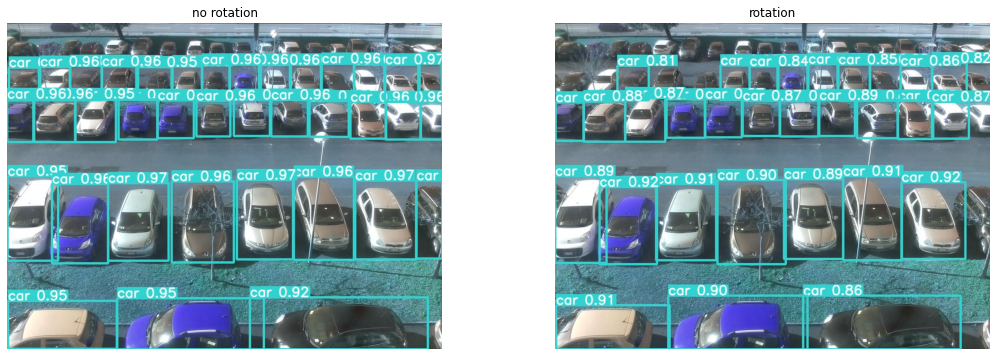

In [ ]:
# create figure
fig = plt.figure(figsize=(18, 6))
  
# setting values to rows and column variables
rows = 1
columns = 2
rd = random.sample(testimgs_exp43, 2)
# reading images
Image1 = cv2.imread(default_path+rd[0])
Image2 = cv2.imread(rotation_path+rd[0])

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("no rotation")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("rotation")



### test on images from online
camera 9번에서 사용한 모델 이용
1. default data augmentation 값을 사용한 모델 -> runs/train/plot_results40
2. default setting + rotation, shear, mixup 기법이 사용된 모델 -> runs/train/plot_results39

In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/yolov5

/content/drive/MyDrive/Colab Notebooks/yolov5


In [ ]:
!pip install -r requirements.txt

In [ ]:
#without rotation(hyperparameter tuning)
!python detect.py --weights /content/drive/MyDrive/Colab\ Notebooks/yolov5/runs/train/plot_results40/weights/best.pt --img 640 --conf 0.7 --source /content/drive/MyDrive/Colab\ Notebooks/yolov5/test_10imgs/ --name default_part3

detect: weights=['/content/drive/MyDrive/Colab Notebooks/yolov5/runs/train/plot_results40/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/yolov5/test_10imgs/, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=default_part3, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-12-29 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 367 layers, 46129818 parameters, 0 gradients, 107.9 GFLOPs
image 1/9 /content/drive/MyDrive/Colab Notebooks/yolov5/test_10imgs/outside_pklot_kr_44.jpg: 256x640 Done. (0.023s)
image 2/9 /content/drive/MyDrive/Colab Notebooks/yolov5/test_10imgs/outside_pklots_28.jpg: 352x640 23 cars, Done. (0.023s)
image 3/9 /content/drive/MyDrive/Colab Notebook

In [ ]:
#with rotation, shear, mixup(hyperparameter tuning)
!python detect.py --weights /content/drive/MyDrive/Colab\ Notebooks/yolov5/runs/train/plot_results39/weights/best.pt --img 640 --conf 0.7 --source /content/drive/MyDrive/Colab\ Notebooks/yolov5/test_10imgs/ --name newset_part3

detect: weights=['/content/drive/MyDrive/Colab Notebooks/yolov5/runs/train/plot_results39/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/yolov5/test_10imgs/, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=newset_part3, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-12-29 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 367 layers, 46129818 parameters, 0 gradients, 107.9 GFLOPs
image 1/9 /content/drive/MyDrive/Colab Notebooks/yolov5/test_10imgs/outside_pklot_kr_44.jpg: 256x640 24 cars, Done. (0.024s)
image 2/9 /content/drive/MyDrive/Colab Notebooks/yolov5/test_10imgs/outside_pklots_28.jpg: 352x640 26 cars, Done. (0.024s)
image 3/9 /content/drive/MyDrive/Colab 

## test on 각도가 다른 주차장




In [ ]:
#without rotation(hyperparameter tuning)
!python detect.py --weights /content/drive/MyDrive/Colab\ Notebooks/yolov5/runs/train/plot_results40/weights/best.pt --img 640 --conf 0.7 --source /content/drive/MyDrive/Colab\ Notebooks/CNRPARK_final/cam9_dataset/cam8/test/images/ --name default_part3_oncam9

detect: weights=['/content/drive/MyDrive/Colab Notebooks/yolov5/runs/train/plot_results40/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/cam8/test/images/, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=default_part3_oncam9, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-12-29 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 367 layers, 46129818 parameters, 0 gradients, 107.9 GFLOPs
image 1/40 /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/cam8/test/images/2016-01-18_0743.jpg: 480x640 21 emtpys, 4 cars, Done. (0.025s)
image 2/40 /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/cam8/test/images/201

In [ ]:
#with rotation, shear, mixup(hyperparameter tuning)
!python detect.py --weights /content/drive/MyDrive/Colab\ Notebooks/yolov5/runs/train/plot_results39/weights/best.pt --img 640 --conf 0.7 --source /content/drive/MyDrive/Colab\ Notebooks/CNRPARK_final/cam9_dataset/cam8/test/images/ --name newset_part3_oncam9

detect: weights=['/content/drive/MyDrive/Colab Notebooks/yolov5/runs/train/plot_results39/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/cam8/test/images/, imgsz=[640, 640], conf_thres=0.7, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=newset_part3_oncam9, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-12-29 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 367 layers, 46129818 parameters, 0 gradients, 107.9 GFLOPs
image 1/40 /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/cam8/test/images/2016-01-18_0743.jpg: 480x640 15 emtpys, 4 cars, Done. (0.025s)
image 2/40 /content/drive/MyDrive/Colab Notebooks/CNRPARK_final/cam9_dataset/cam8/test/images/2016

## test on 영상

In [ ]:
#without rotation(hyperparameter tuning)
!python detect.py --weights /content/drive/MyDrive/Colab\ Notebooks/yolov5/runs/train/plot_results40/weights/best.pt --img 640 --conf 0.7 --source /content/drive/MyDrive/Colab\ Notebooks/park_intact.mp4 --name default_part3_onvideo

In [ ]:
#with rotation, shear, mixup(hyperparameter tuning)
!python detect.py --weights /content/drive/MyDrive/Colab\ Notebooks/yolov5/runs/train/plot_results39/weights/best.pt --img 640 --conf 0.7 --source /content/drive/MyDrive/Colab\ Notebooks/park_intact.mp4 --name newset_part3_onvideo

In [ ]:
#without rotation(hyperparameter tuning)
!python detect.py --weights /content/drive/MyDrive/Colab\ Notebooks/yolov5/runs/train/rsmp_results/weights/best.pt --img 640 --conf 0.6 --source /content/drive/MyDrive/Colab\ Notebooks/yolov5/test_10imgs/

detect: weights=['/content/drive/MyDrive/Colab Notebooks/yolov5/runs/train/rsmp_results/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/yolov5/test_10imgs/, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-12-29 torch 1.10.0+cu111 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model Summary: 367 layers, 46129818 parameters, 0 gradients, 107.9 GFLOPs
image 1/9 /content/drive/MyDrive/Colab Notebooks/yolov5/test_10imgs/outside_pklot_kr_44.jpg: 256x640 Done. (0.023s)
image 2/9 /content/drive/MyDrive/Colab Notebooks/yolov5/test_10imgs/outside_pklots_28.jpg: 352x640 9 emtpys, 28 cars, Done. (0.022s)
image 3/9 /content/drive/MyDrive/Colab Notebooks/

In [ ]:
# default(w/o data augmentation) & rotation(w/ data augmentation)
# test on the same test set (CNR park)
testimgs_exp44 = glob.glob('/content/drive/MyDrive/Colab Notebooks/yolov5/runs/detect/exp45/*.jpg')
testimgs_exp44 = [x[x.find('exp45/')+5:] for x in testimgs_exp44]
default_path = "/content/drive/MyDrive/Colab Notebooks/yolov5/runs/detect/exp46/"
rotation_path = "/content/drive/MyDrive/Colab Notebooks/yolov5/runs/detect/exp47/"

Text(0.5, 1.0, 'rotation')

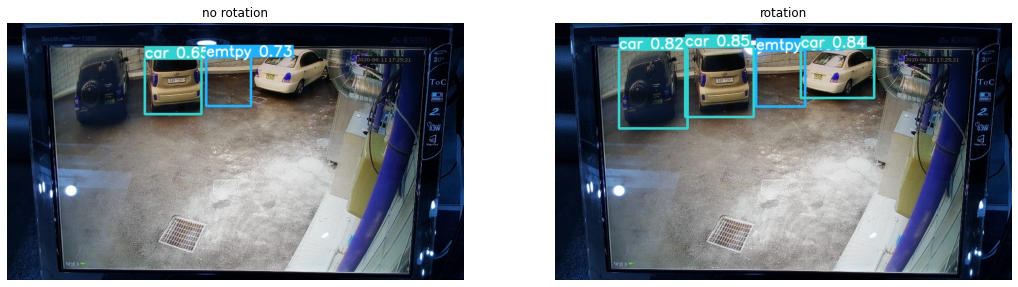

In [ ]:
# create figure
fig = plt.figure(figsize=(18, 6))
  
# setting values to rows and column variables
rows = 1
columns = 2
rd = random.sample(testimgs_exp44, 2)
# reading images
Image1 = cv2.imread(default_path+rd[0])
Image2 = cv2.imread(rotation_path+rd[0])

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("no rotation")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("rotation")